# CV Scanner

## About Data:
-------------
Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [4]:
df.shape

(962, 2)

In [5]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [6]:
# df.iloc[0,1]  # Resume sample

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

## Data Preprocessing

### Check Nulls

In [8]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

#### There is no Missing values

### Check Duplicates

In [9]:
df.duplicated().sum()

796

#### Remove duplicates

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(166, 2)

### Text Cleaning

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

In [13]:
# Load spaCy for NER (use small model for speed)
nlp = spacy.load("en_core_web_sm")

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [15]:
# Dictionaries for protection
TECH_PROTECT = [
    "Python","Java","C++","C#","R","Scala","JavaScript","TypeScript","PHP",
    "HTML","CSS","SQL","NoSQL","MATLAB","Naive Bayes","OpenCV","Matplotlib",
    "TensorFlow","PyTorch","Keras","NumPy","Pandas","Scikit-learn","TF-IDF",
    "Word2Vec","Doc2Vec","VADER","TextBlob","spaCy","Elasticsearch","Kibana",
    "Bootstrap","Spark","Hadoop","Hive","Pig","WebDriver","QlikSense","Bluemix",
    "Watson","Lex","Flask","Django","React","Angular","Node.js","Spring",
    "Spring Boot","MySQL","PostgreSQL","Oracle","MongoDB","Redis","Cassandra",
    "AWS","Azure","GCP","Docker","Kubernetes","Jenkins","Terraform","Ansible",
    "Git","GitHub","GitLab","CI/CD","Selenium","JUnit","TestNG","Postman",
    "Cucumber","Oracle 11g","Oracle 12c","Oracle 19c","Informatica",
    "Informatica PowerCenter","PL/SQL","Data Warehousing","Data Mart","Cognos",
    "TCP/IP","VPN","Firewall","IDS","IPS","Wireshark","Kali","Splunk","SIEM",
    "SAP","Salesforce","ServiceNow","Workday","Tableau","PowerBI","Excel",
    "SPSS","Jira","Confluence","Slack","Trello","MapReduce","Cloudera",
    "Cloudera Manager","Hue","Dataiku","Unravel","Greenplum","Autosys","TWS",
    "IntelliMatch"
]

ACRONYMS = [
    "ML","AI","DL","NLP","CV","IoT","RPA","ETL","API","SQL","NoSQL","OOP",
    "LLP","REST","SOAP","JSON","XML","JWT","HR","KPI","OKR","ERP","CRM",
    "GDPR","PMO","PMP","MBA","B.Sc","M.Sc","PhD","BI","RDBMS","HA","COE","UBC"
]

BRANDS = [
    "Google","Microsoft","IBM","Oracle","Cisco","AWS","RedHat","CompTIA","SAP",
    "EY","Ernst & Young","Accenture","Deloitte","Infosys","TCS","Wipro",
    "Capgemini","Coursera","Udemy","edX"
]

In [16]:
PROTECTED = set([t.lower() for t in TECH_PROTECT + ACRONYMS + BRANDS])

In [17]:
def clean_resume(text: str) -> str:
    # Remove emails, URLs & phone numbers
    text = re.sub(r'\S+@\S+', ' ', text)
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    text = re.sub(r'\+?\d[\d\-\s]{7,}\d', ' ', text)

    # Remove unwanted special characters, keep + # . and -
    text = re.sub(r'[^A-Za-z0-9+#.\-\s]', ' ', text)

    # Lowercase text
    text = text.lower()

    # 4. Tokenization
    tokens = nltk.word_tokenize(text)
    
    # 5. Remove stopwords and short words
    tokens = [t for t in tokens if (t not in stop_words or t in PROTECTED) and len(t) > 2]
    
    # 6. Lemmatization
    tokens = [lemmatizer.lemmatize(t) if t not in PROTECTED else t for t in tokens]
    
    # 7. Join tokens back
    cleaned_text = ' '.join(tokens)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

In [18]:
df['Cleaned_Resume'] = df['Resume'].apply(clean_resume)

In [19]:
print("Resume Before Cleaning:")
print("-----------------------")
print(df.iloc[0,1])
print("-"*100), print()
print("Resume After Cleaning:")
print("----------------------")
print(df.iloc[0,2])

Resume Before Cleaning:
-----------------------
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - F

### Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'])

In [21]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [22]:
data = df.drop(columns=['Category','Resume'])
data.head()

,Cleaned_Resume,Category_Encoded
0,skill programming language python pandas numpy...,6
1,education detail may 2013 may 2017 b.e uit-rgp...,6
2,area interest deep learning control system des...,6
3,skill python sap hana tableau sap hana sql sap...,6
4,education detail mca ymcaust faridabad haryana...,6


### Feature Extraction

In [23]:
def extract_skills(text):
    tokens = text.split()
    skills = [t for t in tokens if t in PROTECTED]
    return list(set(skills))  # unique skills

df['Skills'] = df['Cleaned_Resume'].apply(extract_skills)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # limit vocabulary
X = vectorizer.fit_transform(data['Cleaned_Resume'])

In [25]:
y = data['Category_Encoded']

## Exploratory Data Analysis (EDA)

In [26]:
from collections import Counter

### Job Distribution

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_16240\3304316042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Job Category')

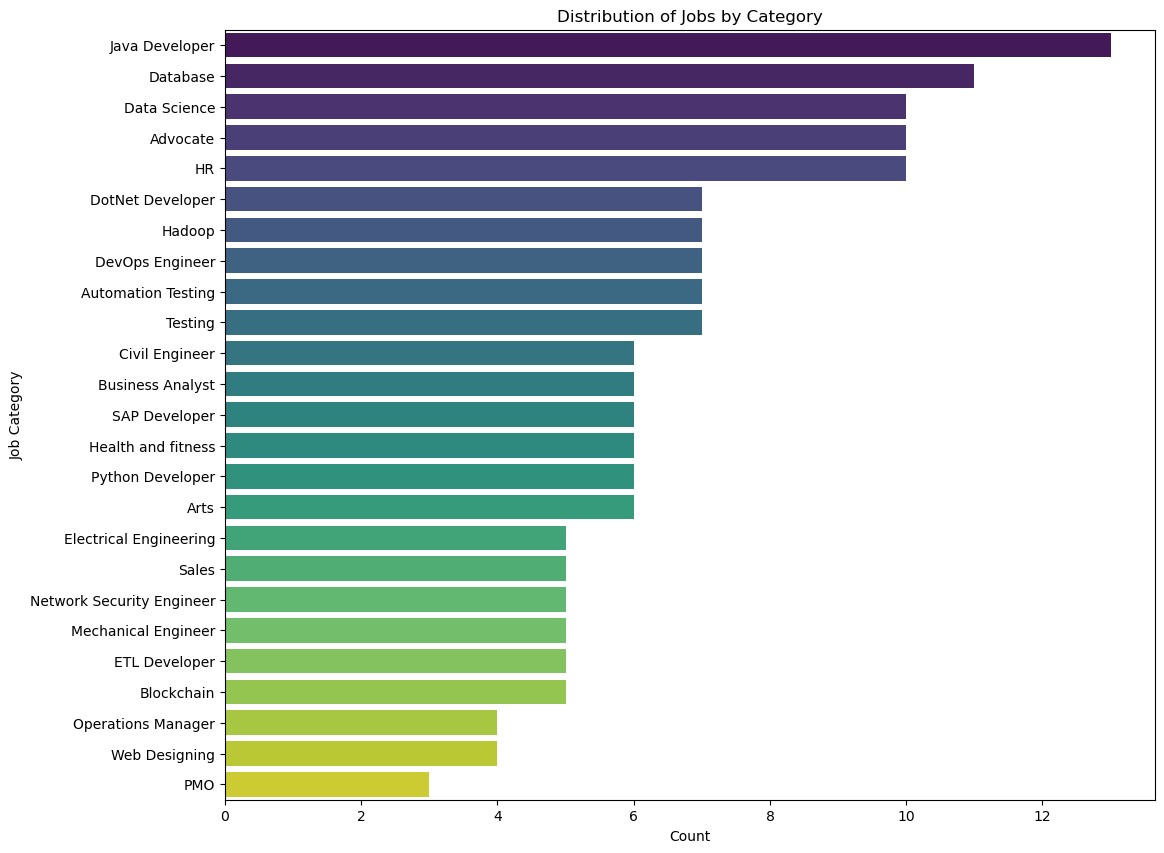

In [27]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='viridis')
plt.title("Distribution of Jobs by Category")
plt.xlabel("Count")
plt.ylabel("Job Category")

### Most Required Skills

In [28]:
# Flatten all skills into a single list
all_skills = [skill.lower() for skills_list in df['Skills'] for skill in skills_list]

# Count frequency of each skill
skill_counts = Counter(all_skills)

# Top 20 most frequent skills
top_skills = skill_counts.most_common(20)
print("Top 20 Skills:", top_skills)

Top 20 Skills: [('sql', 51), ('java', 42), ('oracle', 32), ('html', 29), ('mysql', 28), ('python', 26), ('microsoft', 25), ('excel', 20), ('javascript', 19), ('c++', 17), ('css', 16), ('api', 16), ('selenium', 11), ('spring', 11), ('jira', 11), ('erp', 10), ('bootstrap', 10), ('angular', 10), ('sap', 10), ('aws', 10)]


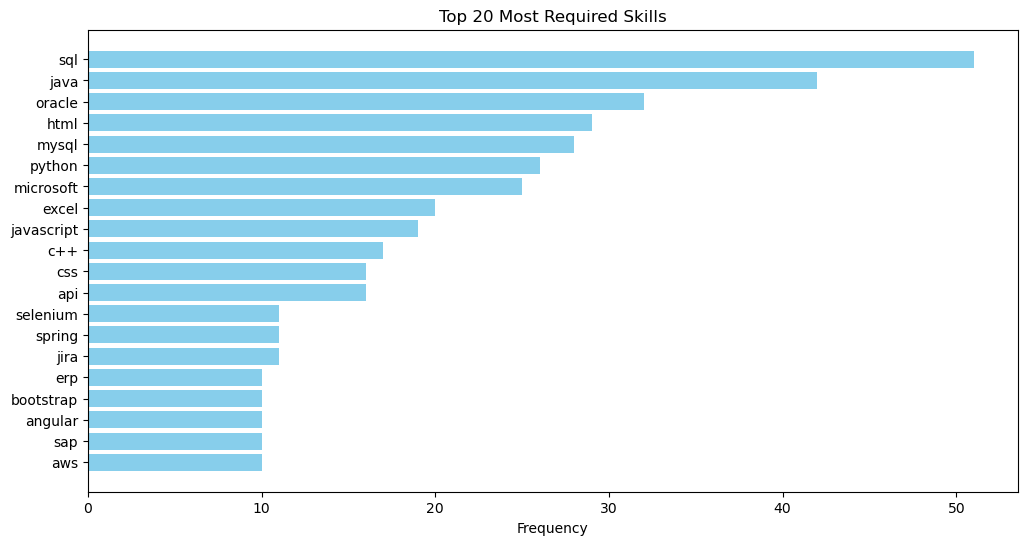

In [29]:
# Bar plot for top 20 skills
skills, counts = zip(*top_skills)
plt.figure(figsize=(12,6))
plt.barh(skills[::-1], counts[::-1], color='skyblue')
plt.xlabel("Frequency")
plt.title("Top 20 Most Required Skills")
plt.show()

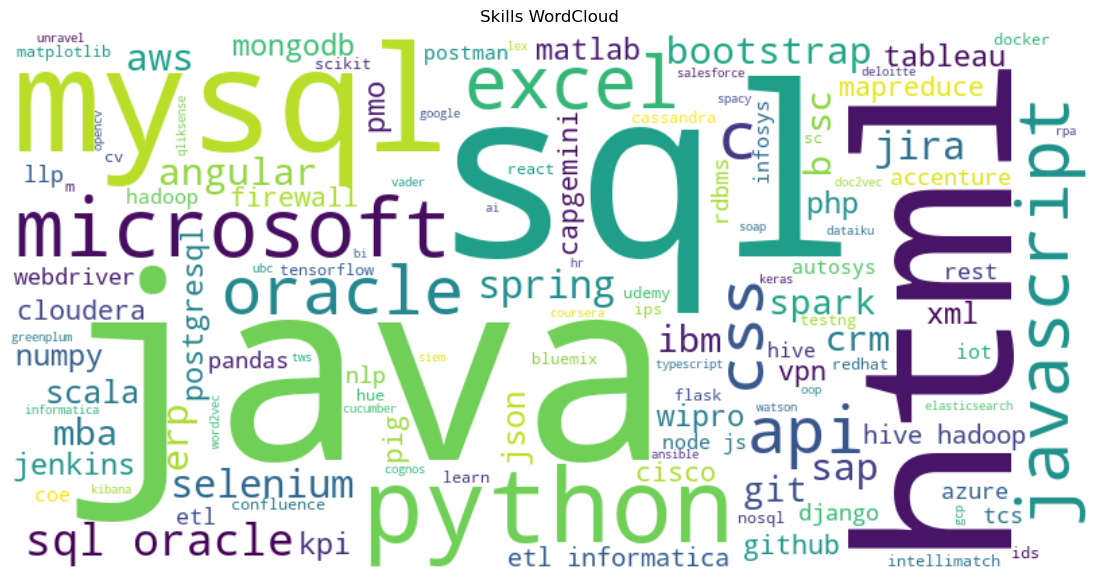

In [30]:
from wordcloud import WordCloud

skill_text = " ".join(all_skills)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skill_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Skills WordCloud")
plt.show()